<a href="https://colab.research.google.com/github/QuangDuyxyz/ML/blob/main/Project_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install underthesea

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 78.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.5/993.5 kB 73.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 599.6/599.6 kB 64.5 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import re
import underthesea
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

# Tiến hành đọc dữ liệu từ file sử dụng thư viện pandas

In [3]:
data = pd.read_csv('/content/drive/MyDrive/project_ML/ML_final.csv')
data.head()

,Feedback,Label
0,"Mình mua máy được 4 ngày rồi, nói chung ok, gi...",1
1,"Em mới mua máy hôm qua , máy bắt sóng 4g qua y...",-1
2,k có hóa đơn và thẻ bảo hành k biết hỏng thì t...,0
3,"máy ngoại hình đẹp phím mềm,nghe gọi to rõ,âm ...",0
4,Tại sao pin 5000 mà mình lướt facebook với chơ...,-1


In [4]:
data.shape

(1999, 2)

<Axes: xlabel='Label', ylabel='count'>

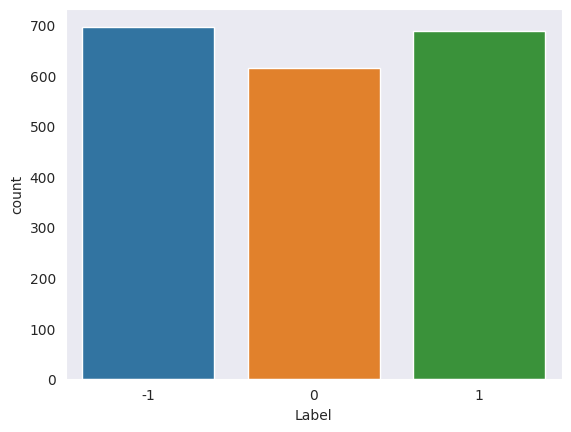

In [5]:
import seaborn as sns
sns.set_style("dark")
sns.countplot(x="Label", data=data)

In [6]:
X_data = data['Feedback']
Y_data = data['Label']

In [7]:
print(X_data)

0       Mình mua máy được 4 ngày rồi, nói chung ok, gi...
1       Em mới mua máy hôm qua , máy bắt sóng 4g qua y...
2       k có hóa đơn và thẻ bảo hành k biết hỏng thì t...
3       máy ngoại hình đẹp phím mềm,nghe gọi to rõ,âm ...
4       Tại sao pin 5000 mà mình lướt facebook với chơ...
                              ...                        
1994    Pin em nó quá khủng, lại sạc được cho smartpho...
1995    Rất tốt trong tầm giá Mình đả test qua nhiều d...
1996    Mình dùng từ tháng 1 tới giờ vẫn rất ngon Ko c...
1997    Mình mua đc 3 ngày thì cảm thấy máy rất OK chư...
1998    Máy lỗi đủ thứ Fb coi là văng hoài nói chung l...
Name: Feedback, Length: 1999, dtype: object


# Tiền xử lý dữ liệu
> Tiền xử lý dữ liệu, ở đây chúng ta tiến hành các bước như sau:
>>Đưa các ký tự về chữ thường.

  >>Loại bỏ các số

  >>Loại bỏ các dấu câu
  
>>Loại bỏ khoảng trắng thừa

>>Bỏ bớt các chữ cái giống nhau liên tiếp (Vd: Quaaaa -> qua )

>>Tách từ tiếng việt sử dụng thư viện underthesea có sẵn

>>Chuẩn hóa dữ liệu



























In [8]:
#Đưa về kiểu chữ thường
def text_lowercase(text):
    return text.lower()

re.sub: 1 phương thức có tác dụng so khớp và thay thế chuỗi so khớp được.

Với: r’\d’ tương ứng với bất kỳ chữ số thập phân Unicode nào [0-9].

-> Thay thế các chữ số tìm được bằng ''.

In [9]:
#Loại bỏ các con số
def remove_number(text):
    result = re.sub(r'\d+', '', text) 
    return result

Dùng hàm .replace có sẵn trong python để thay thế các dấu câu tìm được bằng “ ”.

In [10]:
#Loại bỏ các dấu câu
def remove_punctuation(text):
    text = text.replace(",", " ").replace(".", " ") \
    .replace(";", " ").replace("“", " ") \
    .replace(":", " ").replace("”", " ") \
    .replace('"', " ").replace("'", " ") \
    .replace("!", " ").replace("?", " ") \
    .replace("-", " ").replace("?", " ")  
    return text

Dùng hàm .split() để chuyển chuỗi text thành một list cắt theo separator (dấu phân tách) – separator để trống mặc định là khoảng cách.

Sau đó dùng hàm .join() để chuyển list về chuỗi - các phần tử cách nhau bởi một khoảng cách “ ”.

In [11]:
#Loại bỏ khoảng trắng thừa
def remove_whitespace(text): 
    return  " ".join(text.split())

In [12]:
# Bỏ bớt các chữ cái giống nhau liên tiếp( Vd: quaaa -> qua)
def remove_similarletter(text):
    text = re.sub(r'([A-Z])\1+', lambda m: m.group(1).upper(), text, flags=re.IGNORECASE)
    return text

In [13]:
#Tách từ tiếng Việt sử dụng thư viện underthesea có sẵn
def VN_Tokenize(text,format='text'):
  return underthesea.word_tokenize(text)

In [14]:
print(VN_Tokenize("hàng cũ không đáng để mua"))

['hàng', 'cũ', 'không', 'đáng', 'để', 'mua']


Stopwords là những từ xuất hiện rất nhiều trong các bài viết, các đoạn text nhưng lại không hề liên quan gì đến nội dung và ý nghĩa của bài viết, gây mơ hồ, làm quá trình máy học, phân loại giảm đi độ chính xác. file vietnamese-stopwords-dash.txt chứa một list những từ stopwords Tiếng Việt của tác giả Lê Văn Duyệt và chúng em có tinh chỉnh lại file cho phù hợp với đồ án lần này.

In [15]:
#Loại bỏ các stopwords tiếng Việt sử dụng bộ stopwords có sẵn 
def remove_VN_stopwords(text):
    file_stopwords = pd.read_csv('/content/drive/MyDrive/project_ML/vietnamese-stopwords-dash.txt', encoding = 'UTF-8')
    file_stopwords.columns = ["Stop_words"]

    VN_stopword = []
    for i in file_stopwords["Stop_words"]:
        VN_stopword.append(i)
        
    text_token = VN_Tokenize(text)
    result = [word for word in text_token if word not in VN_stopword]
    return " ".join(result)

Trong lúc thu thập dữ liệu, chúng em thu thập được một dict chứa các teencode, viết tắt,… Trong quá trình xử lí dữ liệu, sẽ thực hiện tìm trong các bình luận nếu chứa các từ giống với key của phần tử trong replace_list ,ta gán giá trị từ đó bằng value của key tương ứng.

In [16]:
#Chuẩn hóa dữ liệu
def Util(text):
    replace_list = {
       ':v':'hihi', '<3':'yêu', '♥️':'yêu','❤':'yêu','a':'anh','ac':'anh chị','ace':'anh chị em','ad':'quản lý',
       'ae':'anh em','ah':'à','ak':'à','amin':'quản lý','androir':'android','app':'ứng dụng','auto ':'tự động',
       'ây':'vậy','b nào':'bạn nào','bằg':'bằng','băng':'bằng','băp':'bắp','băt':'bắt','battery':'pin','bể':'vỡ',
       'been':'bên','best':'nhất','best':'tốt nhất','bgqafy ':'ngày','bh':'bao giờ','bh':'bây giờ','bhx':'bảo hành',
       'bi':'bị','big':'lớn','bik':'biết','bin':'pin','bit':'biết','bít':'biết','bn':'bạn','bông tróc':'bong tróc', 'k': 'không', 'ok': 'được',
       'bro':'anh em','bt':'bình thường','bt':'biết','bth':'bình thường','bthg':'bình thường','bua':'bữa','bùn':'buồn',
       'buonc':'buồn','bx':'hộp','bye':'tạm biệt','c':'chị','cac':'các','cam':'máy ảnh','card':'thẻ','châu':'khỏe',
       'chiệu':'triệu','chíp':'chip','chội':'trội','chs':'chơi','chửa':'chữa','chug ':'chung','chup':'chụp','chuq':'chung',
       'clip':'đoạn phim','cmt':'bình luận','co':'có','cở':'cỡ','cọc':'cột','cpu':'chíp xử lý','cty':'công ty',
       'cua':'của','cũg':'cũng','cug ':'cũng','cuh':'cũng','cùi':'tệ','củng':'cũng','cụt':'cục','cv':'công việc',
       'cx':'cũng','đ':' đồng','dag':'đang','dăng':'văng','dấp':'lỗi','dất':'rất','đay':'đấy','đâỳ':'đầy','đc':'được',
       'dè':'rè','dể':'dễ','delay':'trễ','dêm':'đêm','đén':'đến','deplay ':'chậm','deu':'đều','diem':'điểm','dien':'diện',
       'đien':'điển','điễn':'điển','dienmayxanh':'điện máy xanh','dín':'dính','dis':'văng','diss':'văng','dk':'được',
       'dmx':'điện máy xanh','dô':'vào','dõ':'rõ','dỡ':'dở','đỗi':'đổi','download':'tải','drop':'tụt','dt':'điện thoại',
       'đt':'điện thoại','đth':'điện thoại','đthoai':'điện thoại','du':'dù','dùg':'dùng','dừg':'dừng','đứg':'đứng',
       'dụg ':'dụng','dung':'dùng','đụng':'chạm','đươc':'được','đuọc ':'được','đưowjc':'được','dựt ':'giật','dx':'được'
       ,'đx':'được','đy':'đi','e':'em','ế':'không bán được','êm':'tốt','f':'facebook','fabook':'facebook',
       'face':'facebook','fast':'nhanh','fb':'facebook','fim':'phim','fix':'sửa','flash sale':'giảm giá','fm':'đài',
       'for what':'vì sao','fps':'tốc độ khung hình','full':'đầy','future':'tương lai','game':'trò chơi','gem':'trò chơi',
       'geme':'trò chơi','gia tiên':'giá tiền','giât':'giật','giốg ':'giống','giử':'dữ','giùm':'dùm','gmae':'trò chơi',
       'gởi':'gửi','gold':'vàng','gơn':'hơn','good':'tốt','good jup':'tốt','gop':'góp','gửa':'gửi','gủng':'cái','h':'giờ',
       'haiz':'thở dài','hẵn ':'hẳn','hành':'hành','hazzz':'haizz','hc':'học','hcm':'hồ chí minh','hd':'chất lượng cao',
       'hdh':'hệ điều hành','hđh':'hệ điều hành','headphone':'tai nghe','hên':'may mắn','hẻo':'yếu','hẹo':'yếu','het':'hết',
       'hét':'hết','hic':'khóc','hieu':'hiểu','high-tech':'công nghệ cao','hít':'sử dụng','hiu':'hiểu','hỉu':'hiểu',
       'hk':'không','hn':'hà nội','hnay':'hôm nay','hoài':'nhiều lần','hoi':'hơi','hới':'hơi','hời':'tốt',
       'hoi han':'hối hận','hok':'không','hong':'không','hông':'không','hot':'nổi bật','hqua':'hôm qua','hs':'học sinh',
       'hssv':'học sinh sinh viên','hut':'hút','huway ':'huawei','huwei ':'huawei','í':'ý','I like it':'tôi thích nó',
       'ik':'đi','ip':'iphone','j':'gì','k':'không','kàm':'làm','kb':'không biết','kg':'không','kh ':'khách hàng',
       'khach':'khách hàng','khát phục':'khắc phục','khj':'khi','khoá ':'khóa','khóai ':'thích','khoẻ':'khỏe',
       'khoẽ':'khỏe','khôg':'không','khoi đong':'khởi động','khong':'không','khoong ':'không','khuân':'khuôn',
       'khủg':'khủng','kím':'kiếm','kipo':'tiêu cực','ko':'không','kt':'kiểm tra','ktra':'kiểm tra','la':'là',
       'lác':'lỗi','lắc':'lỗi','lag':'lỗi','laii':'lại','lak':'giật','lan':'lần','lãng':'giật','lap':'máy tính',
       'laptop':'máy tính','lay':'này','len toi':'lên tới','les':'led','lg':'lượng','lí':'lý','lien':'liên',
       'like':'thích','liti':'nhỏ','live stream':'phát sóng trực tiếp','lm':'làm','ln':'luôn','loadd':'tải ',
       'lôi':'lỗi','lổi':'lỗi','LOL ':'trò chơi','lởm':'kém chất lượng','lỏng lẽo':'lỏng lẻo','luc':'lúc','lun':'luôn',
       'luong':'lượng','luot':'lướt','lưot ':'lượt','m':'mình','mạ':'trời','mắc công':'mất công','macseger':'messenger',
       'mag':'màn','main':'chính','mak':'mà','man':'màn','màng':'màn','màng hình':'màn hình','mao ':'mau','mẩu':'mẫu',
       'mầu ':'màu','max':'lớn nhất','may':'máy','mèn':'màn','méo gì':'làm gì','mih':'mình','mìk':'mình','min':'nhỏ nhât',
       'mìn':'mình','mjh':'mình','mjk':'mình','mjnh':'minh','mk':'mình','mn':'mọi người','mng ':'mọi người','mo':'đâu',
       'mò':'tìm','mobile':'điện thoại','mog':'mong','moi':'mới','mơi':'mới','ms':'mới','mún':'muốn','mước':'mức',
       'mược':'mượt','muot':'mượt','mỷ':'mỹ','n':'nó','n':'nói chuyện','nãn':'nản','nayd':'này','nc':'nói chuyện',
       'nch':'nói chuyện','nch':'nói chung','nếo ':'nếu','ng':'người','ngan':'ngang','nge':'nghe','nghiêm':'nghiệm',
       'ngĩ':'nghĩ','ngốn':'sử dụng','nguon':'nguồn','nhah':'nhanh','nhan vien':'nhân viên','nhay':'nhạy','nhe':'nhé',
       'nhèo':'nhòe','nhiet':'nhiệt','nhiểu':'nhiều','nhiu':'nhiều','nhìu':'nhiều','nhoè':'nhòe','như v':'như vậy',
       'nhug':'nhưng','nhưg':'nhưng','nhữg':'những','nhung':'nhưng','nhuoc':'nhược','nhượt':'nhược','nock ao':'hạ gục',
       'noi':'nói','nống':'nóng','not':'lưu ý','ns ':'nói','nsx':'ngày sản xuất','nt':'nhắn tin','ntin':'nhắn tin',
       'ntn':'như thế nào','nũa':'nữa','nut ':'nút','nv':'nhân viên','nz':'như vậy','ô xi':'oxy','ofice':'văn phòng',
       'ok':'được','ôk':'được','oke':'được','okee':'được','oki':'được','okie':'được','onl':'sử dụng',
       'ộp ẹp':'không chắc chắn','option':'tùy chọn','or':'hoặc','out':'thoát','oỳ':'rồi','pải':'phải','phảm':'phẩm',
       'phẩn':'phẩm','phan van':'phân vân','phèo':'vậy','phut ':'phút','pít':'biết','pro':'chất lượng cao','pùn':'buồn',
       'pv':'giới thiệu','qá':'quá','qc':'quảng cáo','qtv':'quản trị viên','qua ve':'qua vẻ','quang trọng':'quan trọng',
       'qus':'quá','r ':'rồi','rat':'rất','rát':'rất','rắt':'rất','rata':'rất','rễ':'dễ','rep':'trả lời',
       'research':'nghiên cứu','reset':'cài đặt lại','restart':'khởi động lại','review':'đánh giá','rì':'gì',
       'rinh':'mua','rỏ':'rõ','rùi':'rồi','rùng':'dùng','s':'sao','sac':'sạc','sài':'xài','sài':'dùng','sale':'giảm giá',
       'sale off':'giảm giá','sâng':'sáng','sạt':'sạc','saving':'tiết kiệm','sd':'sử dụng','sdt':'số điện thoại',
       'seal':'mới','search':'tìm kiếm','sefil':'chụp ảnh','selfie':'chụp ảnh','setting':'cài đặt','setup':'cài đặt',
       'sexy':'quyến rũ','shiper':'nhân viên giao hàng','shop':'cửa hàng','skill':'kỹ năng','smooth':'mượt',
       'so good':'rất tốt','sp':'sản phẩm','sphẩm':'sản phẩm','stars':'sao','sử':'xử','suất':'xuất','sưj':'sự',
       'sước':'xước','super':'siêu','support':'hỗ trợ','sụt':'tụt','sv':'sinh viên','sx':'sản xuất','t':'tôi',
       'T G D Đ':'thế giới di động','tằm ':'tầm','tes':'kiểm tra','test':'kiểm tra','tet':'tết','teung':'trung',
       'tg':'thời gian','tgdd':'thế giới di động','tgdđ':'thế giới di động','thag':'tháng','thág':'tháng','ship':'giao','Ship':'giao',
    }
    text = text.split()
    len_ = len(text)
    for i in range(0, len_):    
      for k, v in replace_list.items():
        if (text[i]==k):
          text[i] = v
    return " ".join(text)

In [17]:
print(Util("Mau ship hàng tới để tôi còn lên đồ đi cua gái vào thag tới"))

Mau giao hàng tới để tôi còn lên đồ đi của gái vào tháng tới


tổng hợp các hàm về một hàm xử lý dữ liệu (Text_PreProcessing_noutil) để thuận tiện cho việc sử dụng:

In [18]:
def Text_PreProcessing_util(data):
  result_1 = []
  for i in data:
    i = str(i)
    text = text_lowercase(i)
    text = remove_similarletter(text)
    text = remove_number(text)
    text = remove_punctuation(text)
    text = remove_whitespace(text)
    text = remove_VN_stopwords(text)
    text = Util(text)
    result_1.append(text)
  return result_1

In [19]:
X_data_1 = X_data
Y_data_1 = Y_data

In [21]:
X_data_1 = Text_PreProcessing_util(X_data_1)

In [22]:
print(X_data_1[1])

mới mua máy hôm qua máy bắt sóng g qua yếu loa lớn nhất rè không lỗi bảo hành khắc phục được không


# Trích xuất đặc trưng sử dụng TF-IDF
TF-IDF (Term Frequency - Inverse Document Frequency):

TF: tần số xuất hiện của 1 từ trong 1 văn bản IDF: tần số nghịch của 1 từ trong một tập các văn bản Kỹ thuật TF-IDF dùng để tính toán tần suất xuất hiện của một từ trong văn bản, dựa trên đó để đánh giá mức độ quan trọng của từng từ trong văn bản





In [23]:
vectorizer_1 = TfidfVectorizer()
vectorizer_1.fit(X_data_1)
X_data_tfidf_1 = vectorizer_1.transform(X_data_1).toarray()

In [24]:
print(vectorizer_1.vocabulary_.keys())


dict_keys(['mua', 'máy', 'được', 'ngày', 'nói', 'chung', 'giá', 'anh', 'em', 'dùng', 'nhé', 'lúc', 'sinh', 'nhật', 'tgd', 'nên', 'giảm', 'không', 'mới', 'hôm', 'qua', 'bắt', 'sóng', 'yếu', 'loa', 'lớn', 'nhất', 'rè', 'lỗi', 'bảo', 'hành', 'khắc', 'phục', 'hóa', 'đơn', 'thẻ', 'hỏng', 'thế', 'nào', 'ngoại', 'hình', 'đẹp', 'phím', 'mềm', 'nghe', 'gọi', 'to', 'rõ', 'âm', 'thanh', 'trẻo', 'pin', 'camera', 'quan', 'tâm', 'lắm', 'màn', 'phải', 'chê', 'chất', 'lượng', 'hơi', 'kém', 'chữ', 'vỡ', 'phông', 'đùng', 'chỉnh', 'đọc', 'tin', 'nhắn', 'mà', 'tức', 'tiền', 'cũng', 'hợp', 'lý', 'xài', 'tại', 'sao', 'lướt', 'facebok', 'ván', 'liên', 'quân', 'chỉ', 'tầm', 'tiếng', 'tốt', 'nhân', 'viên', 'nhiệt', 'tình', 'phiên', 'bản', 'chưa', 'dám', 'cập', 'biết', 'sạc', 'nóng', 'cả', 'củ', 'luôn', 'mọi', 'khác', 'ổn', 'tư', 'vấn', 'mi', 'tôi', 'cao', 'quá', 'nản', 'wifi', 'thậm', 'tệ', 'chụp', 'megapixel', 'zom', 'lại', 'chế', 'độ', 'giới', 'thiệu', 'mắc', 'hơn', 'ưu', 'đãi', 'kht', 'sản', 'phẩm', 'nhưng'

In [25]:
print(X_data_tfidf_1.shape)

(1999, 2822)


# Chia bộ dataset và tiến hành train, test, đánh giá các model
Chia bộ dataset theo tỷ lệ train/test ứng với 80/20

In [26]:
X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(X_data_tfidf_1, Y_data_1, test_size=0.2)

# Train và test với model SVC

In [27]:
model_SVC = SVC(kernel='linear')
model_SVC.fit(X_train_1, Y_train_1)
print("Model SVC")
print("Train score: ", model_SVC.score(X_train_1, Y_train_1))
print("Test score: ", model_SVC.score(X_test_1, Y_test_1))
y_pred_SVC = model_SVC.predict(X_test_1)
print("F1 score",f1_score(Y_test_1, y_pred_SVC, average = 'macro'))

Model SVC
Train score:  0.900562851782364
Test score:  0.72
F1 score 0.7162846738081505


Confusion matrix, without normalization
[[ 91  17  17]
 [ 19  79  27]
 [ 12  20 118]]


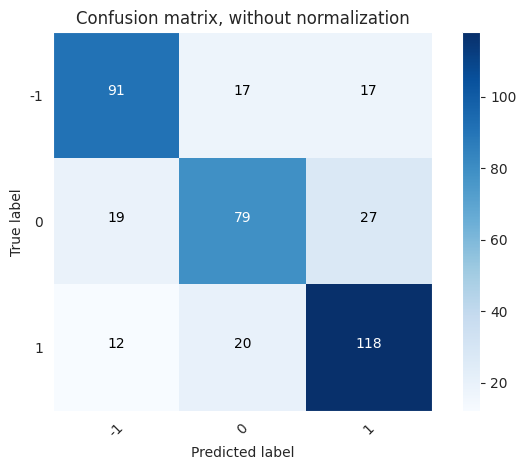

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
  
cnf_matrix_SVC = confusion_matrix(Y_test_1, y_pred_SVC, labels=[-1, 0, 1])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_SVC, classes=[-1, 0, 1],
                      title='Confusion matrix, without normalization')

In [40]:
from sklearn.metrics import classification_report
print(classification_report(Y_test_1, y_pred_SVC, target_names=['-1', '0', '1']))

              precision    recall  f1-score   support

          -1       0.76      0.67      0.71       145
           0       0.68      0.68      0.68       129
           1       0.71      0.81      0.76       126

    accuracy                           0.72       400
   macro avg       0.72      0.72      0.72       400
weighted avg       0.72      0.72      0.72       400



# Với các model MultinomialNB, LogisticRegression

In [41]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

# MultinomialNB

In [42]:
model_nb = MultinomialNB()
model_nb.fit(X_train_1, Y_train_1)
print("Model MultinomialNB")
print("Train score: ", model_nb.score(X_train_1, Y_train_1))
print("Test score: ", model_nb.score(X_test_1, Y_test_1))
y_pred_nb = model_nb.predict(X_test_1)
print("F1 score",f1_score(Y_test_1, y_pred_nb, average = 'macro'))

Model MultinomialNB
Train score:  0.7986241400875547
Test score:  0.655
F1 score 0.6317801672640383


Confusion matrix, without normalization
[[106   4  35]
 [ 48  44  37]
 [ 11   3 112]]


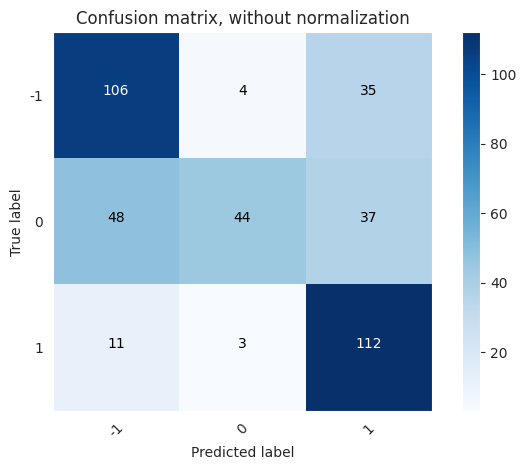

In [43]:
cnf_matrix_NB = confusion_matrix(Y_test_1, y_pred_nb, labels=[-1, 0, 1])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_NB, classes=[-1, 0, 1],
                      title='Confusion matrix, without normalization')

In [44]:
print(classification_report(Y_test_1, y_pred_nb, target_names=['-1', '0', '1']))

              precision    recall  f1-score   support

          -1       0.64      0.73      0.68       145
           0       0.86      0.34      0.49       129
           1       0.61      0.89      0.72       126

    accuracy                           0.66       400
   macro avg       0.70      0.65      0.63       400
weighted avg       0.70      0.66      0.63       400



# Logistic Regression:

In [45]:
model_lr = LogisticRegression()
model_lr.fit(X_train_1, Y_train_1)
print("Model LogisticRegression")
print("Train score: ", model_lr.score(X_train_1, Y_train_1))
print("Test score: ", model_lr.score(X_test_1, Y_test_1))
y_pred_lr = model_lr.predict(X_test_1)
print("F1 score",f1_score(Y_test_1, y_pred_lr, average = 'macro'))

Model LogisticRegression
Train score:  0.8911819887429644
Test score:  0.7175
F1 score 0.7170982905103602


Confusion matrix, without normalization
[[ 93  28  24]
 [ 18  91  20]
 [  6  17 103]]


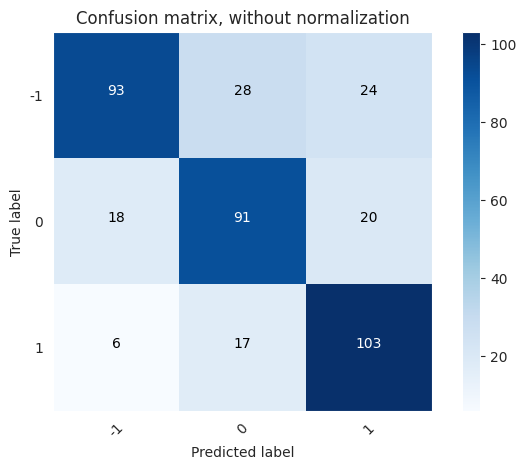

In [46]:
cnf_matrix_lr = confusion_matrix(Y_test_1, y_pred_lr, labels=[-1, 0, 1])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix_lr, classes=[-1, 0, 1],
title='Confusion matrix, without normalization')

In [47]:
print(classification_report(Y_test_1, y_pred_lr, target_names=['-1', '0', '1']))

              precision    recall  f1-score   support

          -1       0.79      0.64      0.71       145
           0       0.67      0.71      0.69       129
           1       0.70      0.82      0.75       126

    accuracy                           0.72       400
   macro avg       0.72      0.72      0.72       400
weighted avg       0.72      0.72      0.72       400



# Lưu model đã train

In [48]:
import pickle 

In [49]:
pickle.dump(model_SVC, open("/content/drive/MyDrive/project_ML/model_svc.pkl", 'wb'))

In [50]:
pickle.dump(model_nb, open("/content/drive/MyDrive/project_ML/model_MultinomialNB.pkl", 'wb'))

In [51]:
pickle.dump(model_lr, open("/content/drive/MyDrive/project_ML/model_LogisticRegression.pkl", 'wb'))

# Dự đoán cho 1 câu mới được nhập vào


> Để tiến hành dự đoán cho một câu feedback mới ta cần thực hiện các bước sau:

>> Nhập câu cần dự đoán

>> Tiến hành các bước tiền xử lý tương tự như trên.

>> Load model của chúng ta.

>> Tiến hành dự đoán và nhận kết quả













In [52]:
def predict(text):
  data = text
  replace_list = {
       ':v':'hihi', '<3':'yêu', '♥️':'yêu','❤':'yêu','a':'anh','ac':'anh chị','ace':'anh chị em','ad':'quản lý',
       'ae':'anh em','ah':'à','ak':'à','amin':'quản lý','androir':'android','app':'ứng dụng','auto ':'tự động',
       'ây':'vậy','b nào':'bạn nào','bằg':'bằng','băng':'bằng','băp':'bắp','băt':'bắt','battery':'pin','bể':'vỡ',
       'been':'bên','best':'nhất','best':'tốt nhất','bgqafy ':'ngày','bh':'bao giờ','bh':'bây giờ','bhx':'bảo hành',
       'bi':'bị','big':'lớn','bik':'biết','bin':'pin','bit':'biết','bít':'biết','bn':'bạn','bông tróc':'bong tróc', 'k': 'không', 'ok': 'được',
       'bro':'anh em','bt':'bình thường','bt':'biết','bth':'bình thường','bthg':'bình thường','bua':'bữa','bùn':'buồn',
       'buonc':'buồn','bx':'hộp','bye':'tạm biệt','c':'chị','cac':'các','cam':'máy ảnh','card':'thẻ','châu':'khỏe',
       'chiệu':'triệu','chíp':'chip','chội':'trội','chs':'chơi','chửa':'chữa','chug ':'chung','chup':'chụp','chuq':'chung',
       'clip':'đoạn phim','cmt':'bình luận','co':'có','cở':'cỡ','cọc':'cột','cpu':'chíp xử lý','cty':'công ty',
       'cua':'của','cũg':'cũng','cug ':'cũng','cuh':'cũng','cùi':'tệ','củng':'cũng','cụt':'cục','cv':'công việc',
       'cx':'cũng','đ':' đồng','dag':'đang','dăng':'văng','dấp':'lỗi','dất':'rất','đay':'đấy','đâỳ':'đầy','đc':'được',
       'dè':'rè','dể':'dễ','delay':'trễ','dêm':'đêm','đén':'đến','deplay ':'chậm','deu':'đều','diem':'điểm','dien':'diện',
       'đien':'điển','điễn':'điển','dienmayxanh':'điện máy xanh','dín':'dính','dis':'văng','diss':'văng','dk':'được',
       'dmx':'điện máy xanh','dô':'vào','dõ':'rõ','dỡ':'dở','đỗi':'đổi','download':'tải','drop':'tụt','dt':'điện thoại',
       'đt':'điện thoại','đth':'điện thoại','đthoai':'điện thoại','du':'dù','dùg':'dùng','dừg':'dừng','đứg':'đứng',
       'dụg ':'dụng','dung':'dùng','đụng':'chạm','đươc':'được','đuọc ':'được','đưowjc':'được','dựt ':'giật','dx':'được'
       ,'đx':'được','đy':'đi','e':'em','ế':'không bán được','êm':'tốt','f':'facebook','fabook':'facebook',
       'face':'facebook','fast':'nhanh','fb':'facebook','fim':'phim','fix':'sửa','flash sale':'giảm giá','fm':'đài',
       'for what':'vì sao','fps':'tốc độ khung hình','full':'đầy','future':'tương lai','game':'trò chơi','gem':'trò chơi',
       'geme':'trò chơi','gia tiên':'giá tiền','giât':'giật','giốg ':'giống','giử':'dữ','giùm':'dùm','gmae':'trò chơi',
       'gởi':'gửi','gold':'vàng','gơn':'hơn','good':'tốt','good jup':'tốt','gop':'góp','gửa':'gửi','gủng':'cái','h':'giờ',
       'haiz':'thở dài','hẵn ':'hẳn','hành':'hành','hazzz':'haizz','hc':'học','hcm':'hồ chí minh','hd':'chất lượng cao',
       'hdh':'hệ điều hành','hđh':'hệ điều hành','headphone':'tai nghe','hên':'may mắn','hẻo':'yếu','hẹo':'yếu','het':'hết',
       'hét':'hết','hic':'khóc','hieu':'hiểu','high-tech':'công nghệ cao','hít':'sử dụng','hiu':'hiểu','hỉu':'hiểu',
       'hk':'không','hn':'hà nội','hnay':'hôm nay','hoài':'nhiều lần','hoi':'hơi','hới':'hơi','hời':'tốt',
       'hoi han':'hối hận','hok':'không','hong':'không','hông':'không','hot':'nổi bật','hqua':'hôm qua','hs':'học sinh',
       'hssv':'học sinh sinh viên','hut':'hút','huway ':'huawei','huwei ':'huawei','í':'ý','I like it':'tôi thích nó',
       'ik':'đi','ip':'iphone','j':'gì','k':'không','kàm':'làm','kb':'không biết','kg':'không','kh ':'khách hàng',
       'khach':'khách hàng','khát phục':'khắc phục','khj':'khi','khoá ':'khóa','khóai ':'thích','khoẻ':'khỏe',
       'khoẽ':'khỏe','khôg':'không','khoi đong':'khởi động','khong':'không','khoong ':'không','khuân':'khuôn',
       'khủg':'khủng','kím':'kiếm','kipo':'tiêu cực','ko':'không','kt':'kiểm tra','ktra':'kiểm tra','la':'là',
       'lác':'lỗi','lắc':'lỗi','lag':'lỗi','laii':'lại','lak':'giật','lan':'lần','lãng':'giật','lap':'máy tính',
       'laptop':'máy tính','lay':'này','len toi':'lên tới','les':'led','lg':'lượng','lí':'lý','lien':'liên',
       'like':'thích','liti':'nhỏ','live stream':'phát sóng trực tiếp','lm':'làm','ln':'luôn','loadd':'tải ',
       'lôi':'lỗi','lổi':'lỗi','LOL ':'trò chơi','lởm':'kém chất lượng','lỏng lẽo':'lỏng lẻo','luc':'lúc','lun':'luôn',
       'luong':'lượng','luot':'lướt','lưot ':'lượt','m':'mình','mạ':'trời','mắc công':'mất công','macseger':'messenger',
       'mag':'màn','main':'chính','mak':'mà','man':'màn','màng':'màn','màng hình':'màn hình','mao ':'mau','mẩu':'mẫu',
       'mầu ':'màu','max':'lớn nhất','may':'máy','mèn':'màn','méo gì':'làm gì','mih':'mình','mìk':'mình','min':'nhỏ nhât',
       'mìn':'mình','mjh':'mình','mjk':'mình','mjnh':'minh','mk':'mình','mn':'mọi người','mng ':'mọi người','mo':'đâu',
       'mò':'tìm','mobile':'điện thoại','mog':'mong','moi':'mới','mơi':'mới','ms':'mới','mún':'muốn','mước':'mức',
       'mược':'mượt','muot':'mượt','mỷ':'mỹ','n':'nó','n':'nói chuyện','nãn':'nản','nayd':'này','nc':'nói chuyện',
       'nch':'nói chuyện','nch':'nói chung','nếo ':'nếu','ng':'người','ngan':'ngang','nge':'nghe','nghiêm':'nghiệm',
       'ngĩ':'nghĩ','ngốn':'sử dụng','nguon':'nguồn','nhah':'nhanh','nhan vien':'nhân viên','nhay':'nhạy','nhe':'nhé',
       'nhèo':'nhòe','nhiet':'nhiệt','nhiểu':'nhiều','nhiu':'nhiều','nhìu':'nhiều','nhoè':'nhòe','như v':'như vậy',
       'nhug':'nhưng','nhưg':'nhưng','nhữg':'những','nhung':'nhưng','nhuoc':'nhược','nhượt':'nhược','nock ao':'hạ gục',
       'noi':'nói','nống':'nóng','not':'lưu ý','ns ':'nói','nsx':'ngày sản xuất','nt':'nhắn tin','ntin':'nhắn tin',
       'ntn':'như thế nào','nũa':'nữa','nut ':'nút','nv':'nhân viên','nz':'như vậy','ô xi':'oxy','ofice':'văn phòng',
       'ok':'được','ôk':'được','oke':'được','okee':'được','oki':'được','okie':'được','onl':'sử dụng',
       'ộp ẹp':'không chắc chắn','option':'tùy chọn','or':'hoặc','out':'thoát','oỳ':'rồi','pải':'phải','phảm':'phẩm',
       'phẩn':'phẩm','phan van':'phân vân','phèo':'vậy','phut ':'phút','pít':'biết','pro':'chất lượng cao','pùn':'buồn',
       'pv':'giới thiệu','qá':'quá','qc':'quảng cáo','qtv':'quản trị viên','qua ve':'qua vẻ','quang trọng':'quan trọng',
       'qus':'quá','r ':'rồi','rat':'rất','rát':'rất','rắt':'rất','rata':'rất','rễ':'dễ','rep':'trả lời',
       'research':'nghiên cứu','reset':'cài đặt lại','restart':'khởi động lại','review':'đánh giá','rì':'gì',
       'rinh':'mua','rỏ':'rõ','rùi':'rồi','rùng':'dùng','s':'sao','sac':'sạc','sài':'xài','sài':'dùng','sale':'giảm giá',
       'sale off':'giảm giá','sâng':'sáng','sạt':'sạc','saving':'tiết kiệm','sd':'sử dụng','sdt':'số điện thoại',
       'seal':'mới','search':'tìm kiếm','sefil':'chụp ảnh','selfie':'chụp ảnh','setting':'cài đặt','setup':'cài đặt',
       'sexy':'quyến rũ','shiper':'nhân viên giao hàng','shop':'cửa hàng','skill':'kỹ năng','smooth':'mượt',
       'so good':'rất tốt','sp':'sản phẩm','sphẩm':'sản phẩm','stars':'sao','sử':'xử','suất':'xuất','sưj':'sự',
       'sước':'xước','super':'siêu','support':'hỗ trợ','sụt':'tụt','sv':'sinh viên','sx':'sản xuất','t':'tôi',
       'T G D Đ':'thế giới di động','tằm ':'tầm','tes':'kiểm tra','test':'kiểm tra','tet':'tết','teung':'trung',
       'tg':'thời gian','tgdd':'thế giới di động','tgdđ':'thế giới di động','thag':'tháng','thág':'tháng',
       'thank':'cảm ơn','thank all':'cảm ơn tất cả','thanks':'cảm ơn','that ':'thật','thegioididong':'thế giới di động',
       'thiệt':'thật','thjk':'thích','thoat':'thoát','thui':'thôi','thuong luu':'thượng lưu','thuyế':'thuyết',
       'tieg':'tiếng','tiếg':'tiếng','tìh':'tình','tin nhắn':'thế này','tks':'cảm ơn','tl':'trả lời','tổg':'tổng',
       'tối thui':'rất tối','tot':'tốt','tôt':'tốt','tp':'thành phố','tr':'triệu','trại':'trải','trán':'chán',
       'trâu':'khỏe','trc':'trước','trc ':'trước','trể':'trễ','treo':'lỗi','trieu':'triệu','truoc':'trước',
       'tt':'trung tâm','tui':'tôi','tươbg ':'tương','tưởg ':'tưởng','tuot':'tuột','tuột':'tụt','tuyêt':'tuyệt',
       'tuyet ':'tuyệt','tv':'ti vi','ứg':'ứng','ưng':'thích','ung y':'ưng ý','ưngz':'ứng','up':'lên','update':'cập nhật',
       'utra':'ultra','v':'vậy','va':'và','vẩn':'vẫn','vặng':'văng','vd':'ví dụ','vể':'vẻ','vêg':'về','very good':'rất tốt',
       'vga':'chip đồ họa','vid':'video','vip':'xịn','vivu':'thoải mái','vk':'vợ','vl':'vãi','vn':'việt nam','vô':'vào',
       'vọc vạch':'dùng thử','vọg':'vọng','vói':'vói','vong':'vọng','vs':'với','vuệc':'việc','vv':'vân vân','wa':'quá',
       'wai':'suốt','wed':'website','wep':'website','wet':'website','wf':'wifi','wi-fi':'wifi','wjfj':'wifi','work':'word',
       'xạc':'sạc','xaci':'xài','xài':'sử dụng','xí':'chút','xik':'xinh','xíu':'chút','xl':'xin lỗi','xog':'xong',
       'xúc':'mua','xướt':'xước','yen tam':'yên tâm','yerhh':'yeah','ytb':'youtube','z':'vậy','zay':'vậy','zị':'vậy',
       'zo':'vào','zoom':'phóng','🎮':'trò chơi','🐃':'trâu','👉':'suy ra','👌':'được','👍':'thích','👍🏼':'thích',
       '👎':'không thích','💯':'100','🔊':'loa','🔋':'pin','😀':'cười','😁':'cười','😂':'khóc','😂':'cười',
       '😆':'cười','😉':'hài lòng','😊':'vui','😋':'lè lưỡi','😌':'suy ngẫm','😍':'yêu','😎':'ngầu','😑':'suy ngẫm',
       '😔':'buồn','😝':'lè lưỡi','😡':'giận','😣':'buồn','😪':'buồn ngủ','😭':'khóc','🙂':'ổn','🙃':'không hiểu',
       '🤔':'thắc mắc','🤗':'vui vẻ','🤗':'đáng yêu','🤣':'cười','🤮':'buồn nôn','🥰':'yêu','thao': 'sao',
       'dùm': 'giúp','review': 'nhận xét','buonc': 'buồn','Bờ Lút': '+','vđ': 'vấn đề','củ': 'triệu','bjo': 'bây giờ', 
       'gè': 'rè','cam': 'máy ảnh','fom': 'kiểu','ẻm': 'em','chời': 'trời','no': 'không','km': 'khuyến mãi',
       'ship': 'vận chuyển','cute': 'dễ thương','rich':' giàu','kid': 'trẻ em','gen': 'thế hệ'
    }

  T = []
  for i in data:
    i = str(i)
  data = text_lowercase(data)
  data = Util(data)
  data = remove_similarletter(data)
  data = remove_number(data)
  data = remove_punctuation(data)
  data = remove_whitespace(data)
  data = remove_VN_stopwords(data)
  data = data.strip()

  T = vectorizer_1.transform([data]).toarray()
  with open('/content/drive/MyDrive/project_ML/model_LogisticRegression.pkl', 'rb') as f:
    model = pickle.load(f)
  prediction = model.predict(T)
  return prediction[0]

Tiến hành hiển thị kế quả

In [53]:
text = input("Input a text to predict: ")
if (predict(text)==1):
  print("Tích cực")
elif (predict(text)==0):
  print("Trung tính")
else:  
  print("Tiêu cực")

Input a text to predict: hàng giao quá chậm, book từ thag 5 mà tới thág 10 mới nhận được
Trung tính


In [54]:
text = input("Input a text to predict: ")
if (predict(text)==1):
  print("Tích cực")
elif (predict(text)==0):
  print("Trung tính")
else:  
  print("Tiêu cực")

Input a text to predict: hàng tốt, dùng ngon
Tích cực


In [55]:
text = input("Input a text to predict: ")
if (predict(text)==1):
  print("Tích cực")
elif (predict(text)==0):
  print("Trung tính")
else:  
  print("Tiêu cực")

Input a text to predict: hàng như cc, giá đắt lại còn cùi bắp
Trung tính


In [56]:
text = input("Input a text to predict: ")
if (predict(text)==1):
  print("Tích cực")
elif (predict(text)==0):
  print("Trung tính")
else:  
  print("Tiêu cực")

Input a text to predict: máy giật lag quá, kém
Tiêu cực
